In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
# Loading the MNIST dataset
(x_train,y_train) , (x_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
# Normalize the pixel values between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
# Define the ANN Model Architecture

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),  # Convert the 28x28 Image into a 1D Array
    keras.layers.Dense(128,activation='relu'),  # Hidden Layer with 128 Units
    keras.layers.Dense(10,activation='softmax')  #Output Layer with 10 units
])

In [5]:
# Compile the Model
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

In [6]:
history = model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2541 - accuracy: 0.9270 - val_loss: 0.1301 - val_accuracy: 0.9601
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1116 - accuracy: 0.9670 - val_loss: 0.0964 - val_accuracy: 0.9704
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0777 - accuracy: 0.9764 - val_loss: 0.0850 - val_accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0586 - accuracy: 0.9828 - val_loss: 0.0805 - val_accuracy: 0.9753
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0451 - accuracy: 0.9860 - val_loss: 0.0794 - val_accuracy: 0.9758


In [7]:
# Predict the Labels of the test Set
import numpy as np
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

313/313 [==============================] - 0s 616us/step


In [8]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
# Print the Confusion Matrix
print('Confusion Matrix')
print(cm)

# Calculate the Accuracy
acc=accuracy_score(y_test,y_pred)

# Printing the Accuracy
print('Accuracy :',acc)

Confusion Matrix
[[ 973    0    1    2    0    0    1    1    2    0]
 [   0 1119    4    2    0    1    2    0    7    0]
 [   7    1  999    2    2    0    2    4   15    0]
 [   1    0    2  989    0    3    0    4    7    4]
 [   0    0    3    1  959    0    4    2    3   10]
 [   2    1    0    9    1  872    3    0    4    0]
 [   4    1    0    1    3    6  939    0    4    0]
 [   1    5    8    3    2    0    0  999    6    4]
 [   3    0    2    2    5    4    3    4  950    1]
 [   3    4    0    5    9    7    0   10   12  959]]
Accuracy : 0.9758


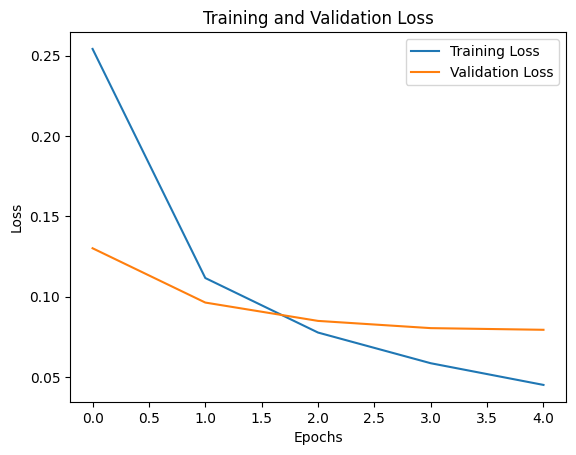

In [10]:
import matplotlib.pyplot as plt

# Plotting the Training and Validation Loss
plt.plot(history.history['loss'] , label='Training Loss')
plt.plot(history.history['val_loss'] , label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

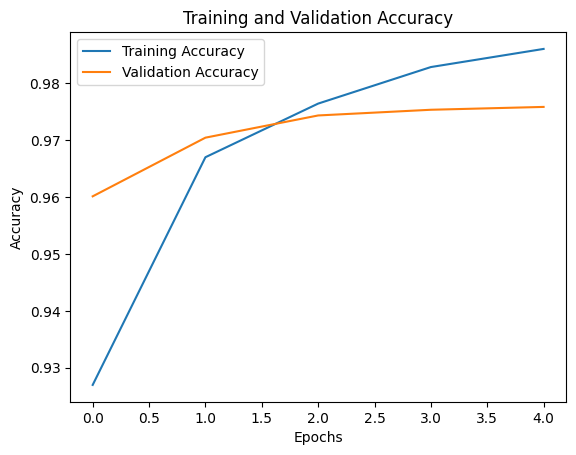

In [11]:
# Plotting the Training and Validation Loss
plt.plot(history.history['accuracy'] , label='Training Accuracy')
plt.plot(history.history['val_accuracy'] , label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()